![UNB](../Assets/images/unb_logo_cor.png)

<div style="text-align: center">
  <h1>Programa de Pós-Graduação em Computação Aplicada</h1>
</div>

<div style="text-align: center">
  <h2>Lista 1: geração de números pseudo-aleatórios</h2>
  <h3>
    Métodos Computacionais Intensivos para Mineração de Dados<br/>
    Prof. Guilherme Rodrigues
  </h3>
</div>
<div  style="text-align: right">
  Aluno: Eduardo Ramos Corrêa
</div>

## Questão 1 - Simulando computacionalmente o gerador de Babel.

**a)** Estime via simulação computacional (Monte Carlo) a probabilidade de se gerar uma palavra válida
(isso é, do dicionário) ao sortear ao acaso sequências de 5 letras (todas com a mesma probabilidade). Em
seguida, calcule analiticamente tal probabilidade e faça um gráfico indicando se a estimativa obtida se
aproxima do valor teórico conforme a amostra aumenta. Atenção: utilize somente as letras do alfabeto
sem carateres especiais.

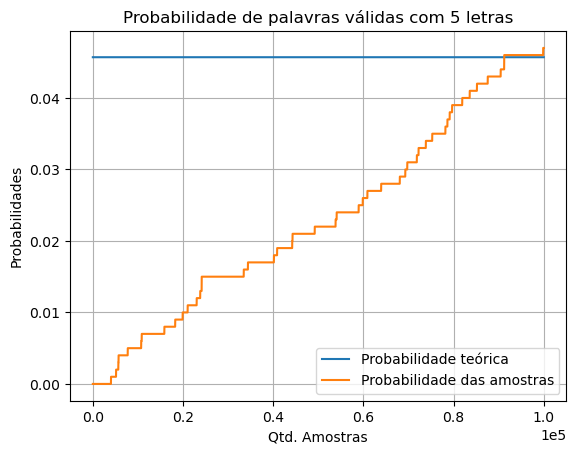

In [1]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


WORD_SIZE = 5        # tamanho da palavra
FILE = "https://github.com/eduardo-correa/MCIMD/raw/master/Lista1/Dicionario.txt"
SAMPLES = 100_000    # quantidade de amostras geradas

# Lendo arquivo dicionário original, convertendo para
# minúsculas, retirando repetidas e deixando
# apenas palavras com 'WORD_SIZE' letras
df_dicionario = pd.read_csv(FILE, names=["palavras"])
df_dicionario['palavras'] = df_dicionario['palavras'].str.lower()
df_dicionario.drop_duplicates(inplace=True)
df_dicionario['palavras'] = np.where(df_dicionario['palavras'].str.len() == WORD_SIZE, df_dicionario['palavras'], np.nan)
df_dicionario.dropna(inplace=True)


palavras_geradas = []
palavras_validas = []
stats = []
for _ in range(SAMPLES):
  palavras_geradas.append(''.join(random.choices(string.ascii_lowercase, k=WORD_SIZE)))
  palavras_validas.append(len(set(palavras_geradas).intersection(list(df_dicionario['palavras']))))
  stats.append(round((palavras_validas[-1]/SAMPLES)*100, 4))

espaco_amostral = len(string.ascii_lowercase)**WORD_SIZE
probabilidade_teorica = round((len(df_dicionario)/espaco_amostral)*100, 4)
df_stats = pd.DataFrame(list(zip(palavras_validas,stats)), columns=['palavras_validas','probabilidade'])


# Geração do gráfico
x = range(SAMPLES)
y = np.repeat(probabilidade_teorica, SAMPLES)
y2 = df_stats['probabilidade']
plt.plot (x, y, label="Probabilidade teórica")
plt.plot (x, y2, label="Probabilidade das amostras")
plt.grid("true")
plt.title("Probabilidade de palavras válidas com 5 letras")
plt.xlabel("Qtd. Amostras")
plt.ylabel("Probabilidades")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.show()


**b)** Estime a probabilidade da sequência gerada ser um palíndromo (ou seja, pode ser lida, indiferentemente, da esquerda para direita ou da direita para esquerda). Compare o resultado com a probabilidade exata, calculada analiticamente.

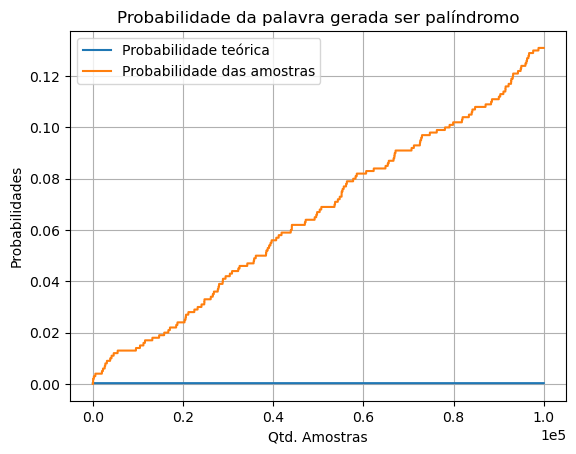

In [2]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


WORD_SIZE = 5        # tamanho da palavra
FILE = "https://github.com/eduardo-correa/MCIMD/raw/master/Lista1/Dicionario.txt"
SAMPLES = 100_000    # quantidade de amostras geradas

# Lendo arquivo dicionário original, convertendo para
# minúsculas, retirando repetidas e deixando
# apenas palavras com 'WORD_SIZE' letras que sejam palíndromos
df_dicionario = pd.read_csv(FILE, names=["words"])
df_dicionario['words'] = df_dicionario['words'].str.lower()
df_dicionario.drop_duplicates(inplace=True)
df_dicionario['words'] = np.where(df_dicionario['words'].str.len() == WORD_SIZE, df_dicionario['words'], np.nan)
df_dicionario.dropna(inplace=True)
df_dicionario['words'] = np.where(df_dicionario['words'] == df_dicionario['words'].str[::-1],df_dicionario['words'], np.nan)
df_dicionario.dropna(inplace=True)

espaco_amostral = len(string.ascii_lowercase)**WORD_SIZE
probabilidade_teorica = round((len(df_dicionario)/espaco_amostral)*100, 4)


palindromos = 0
stats = []
for _ in range(SAMPLES):
  generated_word = ''.join(random.choices(string.ascii_lowercase, k=WORD_SIZE))
  if (generated_word == generated_word[::-1]):
    palindromos += 1
  stats.append(round((palindromos/SAMPLES)*100, 4))

# Geração do gráfico
x = range(SAMPLES)
y = np.repeat(probabilidade_teorica, SAMPLES)
y2 = stats
plt.plot (x, y, label="Probabilidade teórica")
plt.plot (x, y2, label="Probabilidade das amostras")
plt.grid("true")
plt.title("Probabilidade da palavra gerada ser palíndromo")
plt.xlabel("Qtd. Amostras")
plt.ylabel("Probabilidades")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.show()


**c)** Construa um gerador que alterne entre consoantes e vogais (se uma letra for uma vogal, a próxima será uma consoante e vice-versa). Qual a probabilidade de gerar uma palavra válida com este novo gerador?

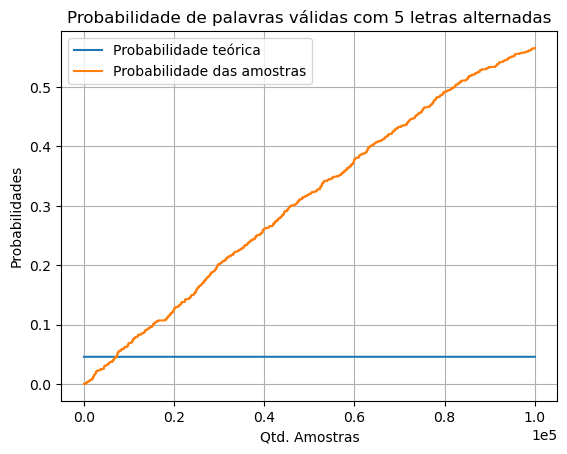

In [3]:
import random
import string

WORD_SIZE = 5        # tamanho da palavra
FILE = "https://github.com/eduardo-correa/MCIMD/raw/master/Lista1/Dicionario.txt"
SAMPLES = 100_000    # quantidade de amostras geradas
VOGAIS =["a", "e", "i", "o", "u"]
CONSOANTES = ["b", "c", "d", "f", "g", "h", "j", "k", "l", "m", "n", "p", "q", "r", "s", "t", "v", "w", "x", "y", "z"]


def criar_alternado ():
  result = ""
  result += random.choice(string.ascii_lowercase)
  if (result in VOGAIS):
    result += random.choice(CONSOANTES)
    result += random.choice(VOGAIS)
    result += random.choice(CONSOANTES)
    result += random.choice(VOGAIS)
  else:
    result += random.choice(VOGAIS)
    result += random.choice(CONSOANTES)
    result += random.choice(VOGAIS)
    result += random.choice(CONSOANTES)
  return result



# Lendo arquivo dicionário original, convertendo para
# minúsculas, retirando repetidas e deixando
# apenas palavras com 'WORD_SIZE' letras
df_dicionario = pd.read_csv(FILE, names=["words"])
df_dicionario['words'] = df_dicionario['words'].str.lower()
df_dicionario.drop_duplicates(inplace=True)
df_dicionario['words'] = np.where(df_dicionario['words'].str.len() == WORD_SIZE, df_dicionario['words'], np.nan)
df_dicionario.dropna(inplace=True)

espaco_amostral = len(string.ascii_lowercase)**WORD_SIZE
probabilidade_teorica = round((len(df_dicionario)/espaco_amostral)*100, 4)


letras_alternadas = []
letras_alternadas_validas = []
stats = []
for _ in range(SAMPLES):
  letras_alternadas.append(criar_alternado ())
  letras_alternadas_validas.append(len(set(letras_alternadas).intersection(list(df_dicionario['words']))))
  stats.append(round((letras_alternadas_validas[-1]/SAMPLES)*100, 4))

df_stats = pd.DataFrame(list(zip(letras_alternadas_validas,stats)), columns=['palavras_validas','probabilidade'])

# Geração do gráfico
x = range(SAMPLES)
y = np.repeat(probabilidade_teorica, SAMPLES)
y2 = df_stats['probabilidade']
plt.plot (x, y, label="Probabilidade teórica")
plt.plot (x, y2, label="Probabilidade das amostras")
plt.grid("true")
plt.title("Probabilidade de palavras válidas com 5 letras alternadas")
plt.xlabel("Qtd. Amostras")
plt.ylabel("Probabilidades")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
plt.show()


**d)** Considere um processo gerador de sequências de 5 caracteres no qual cada letra é sorteada com probabilidade proporcional à sua respectiva frequência na língua portuguesa (veja essa página). Suponha que esse processo gerou uma sequência com ao menos um “a”. Neste caso, estime a probabilidade dessa
sequência ser uma palavra válida.
> **Dica**: Use a função sample e edite o parâmetro prob. Para pensar:<br />
Você consegue calcular essa probabilidade analiticamente? (Não precisa responder.)

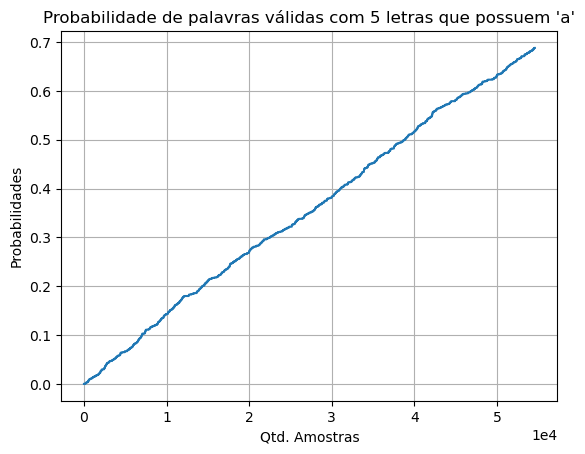

In [21]:
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


WORD_SIZE = 5        # tamanho da palavra
FILE = "https://github.com/eduardo-correa/MCIMD/raw/master/Lista1/Dicionario.txt"
SAMPLES = 100_000    # quantidade de amostras geradas
FREQUENCIAS = [14.63,1.04,3.8,4.99,12.57,1.02,1.30,1.28,6.18,0.40,0.02,2.78,4.74,5.05,10.73,2.52,1.20,6.53,7.81,4.34,4.63,1.67,0.01,0.21,0.01,0.47]

# Lendo arquivo dicionário original, convertendo para
# minúsculas, retirando repetidas e deixando
# apenas palavras com 'WORD_SIZE' letras
df_dicionario = pd.read_csv(FILE, names=["palavras"])
df_dicionario['palavras'] = df_dicionario['palavras'].str.lower()
df_dicionario.drop_duplicates(inplace=True)
df_dicionario['palavras'] = np.where(df_dicionario['palavras'].str.len() == WORD_SIZE, df_dicionario['palavras'], np.nan)
df_dicionario.dropna(inplace=True)

palavras_geradas = []
palavras_validas = []
stats = []
for _ in range(SAMPLES):
  palavras_geradas.append(''.join(random.choices(string.ascii_lowercase, k=WORD_SIZE, weights=FREQUENCIAS)))
  if ('a' in palavras_geradas[-1]):
    palavras_validas.append(len(set(palavras_geradas).intersection(list(df_dicionario['palavras']))))
    stats.append(round((palavras_validas[-1]/SAMPLES)*100, 4))

espaco_amostral = len(string.ascii_lowercase)**WORD_SIZE
df_stats = pd.DataFrame(list(zip(palavras_validas,stats)), columns=['palavras_validas','probabilidade'])


# Geração do gráfico
x = range(len(df_stats))
y = df_stats['probabilidade']
plt.plot (x, y)
plt.grid("true")
plt.title("Probabilidade de palavras válidas com 5 letras que possuem 'a'")
plt.xlabel("Qtd. Amostras")
plt.ylabel("Probabilidades")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()


## Questão 2 - Gerando números pseudo-aleatórios.

**a)** Escreva uma função que gere, a partir do método da transformada integral, uma amostra aleatória de tamanho n da distribuição Cauchy para $n$ e $\gamma$ arbitrários. A densidade da Cauchy($\gamma$) é dada por<p />
$$
f(x) = \frac{1}{\pi\gamma(1+(\frac{x}{\gamma})^2)}
$$

**b)** Uma variável aleatória discreta $X$ tem função massa de probabilidade
$$p(2) = 0.2$$
$$p(3) = 0.1$$
$$p(5) = 0.2$$
$$p(7) = 0.2$$
$$p(9) = 0.3$$

Use o método de transformação inversa para gerar uma amostra aleatória de tamanho 1000 a partir da
distribuição de $X$. Construa uma tabela de frequência relativa e compare as probabilidades empíricas com as teóricas. Repita usando a função _sample_ do R.

**c)** Escreva uma função que gere amostras da distribuição Normal padrão ($\mu = 0$, $\sigma = 1$) usando o método de aceitação e rejeição adotando como função geradora de candidatos, $g(x)$, a distribuição Cauchy padrão (isso é, com $\gamma = 1$).